In [1]:
import numpy as np
import pandas as pd

In [2]:
books = pd.read_csv('BookData/books.csv')
users = pd.read_csv('BookData/users.csv')
ratings = pd.read_csv('BookData/ratings.csv')

C:\Users\VS70\AppData\Local\Temp\ipykernel_16920\2976955910.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('BookData/books.csv')


In [3]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
from pprint import pprint

book_titles = books['Book-Title'].tolist()
pprint(book_titles[27000:30000])


In [ ]:
users.head()

In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
print(books.shape)

(271360, 8)


In [8]:
print(users.shape)

(278858, 3)


In [9]:
print(ratings.shape)

(1149780, 3)


In [ ]:
books.isnull().sum()

In [11]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [12]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [13]:
books.duplicated().sum()

0

In [14]:
users.duplicated().sum()

0

In [15]:
ratings.duplicated().sum()

0

 ### Colaborative reccomendation
 

In [16]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [17]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 175
usefull_users = x[x].index

In [18]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(usefull_users)]

In [19]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] > 40
famous_books = y[y].index

In [20]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [21]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [22]:
pt.fillna(0,inplace=True)

In [37]:
pt

User-ID,254,2033,2276,2766,2977,3363,4017,4385,6251,6323,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
similarity_score = cosine_similarity(pt)

In [26]:
similarity_score.shape

(1126, 1126)

In [27]:
def recommend(book_name):
    #index fetch
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])),key= lambda x:x[1],reverse=True)[1:8]
    
    data = []
    
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    return data

In [29]:
recommend("You Belong To Me")

[['Exclusive',
  'Sandra Brown',
  'http://images.amazon.com/images/P/0446604232.01.MZZZZZZZ.jpg'],
 ["I'll Be Seeing You",
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671888587.01.MZZZZZZZ.jpg'],
 ['The Anastasia Syndrome',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671701231.01.MZZZZZZZ.jpg'],
 ['Loves Music, Loves to Dance',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671758896.01.MZZZZZZZ.jpg'],
 ['All Around the Town',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671793489.01.MZZZZZZZ.jpg'],
 ['Let Me Call You Sweetheart',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671568175.01.MZZZZZZZ.jpg'],
 ['Weep No More My Lady',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0440200989.01.MZZZZZZZ.jpg']]

In [30]:
import pickle 
pickle.dump(pt,open('book_model.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

NameError: name 'similarity_scores' is not defined

In [34]:
ground_truth = ["You Belong To Me", "Me Before You"]  # Replace with real ground truth books


Coverage: 0.8783
Diversity: 0.8672
Novelty: 0.2089
Entropy: 1.3812


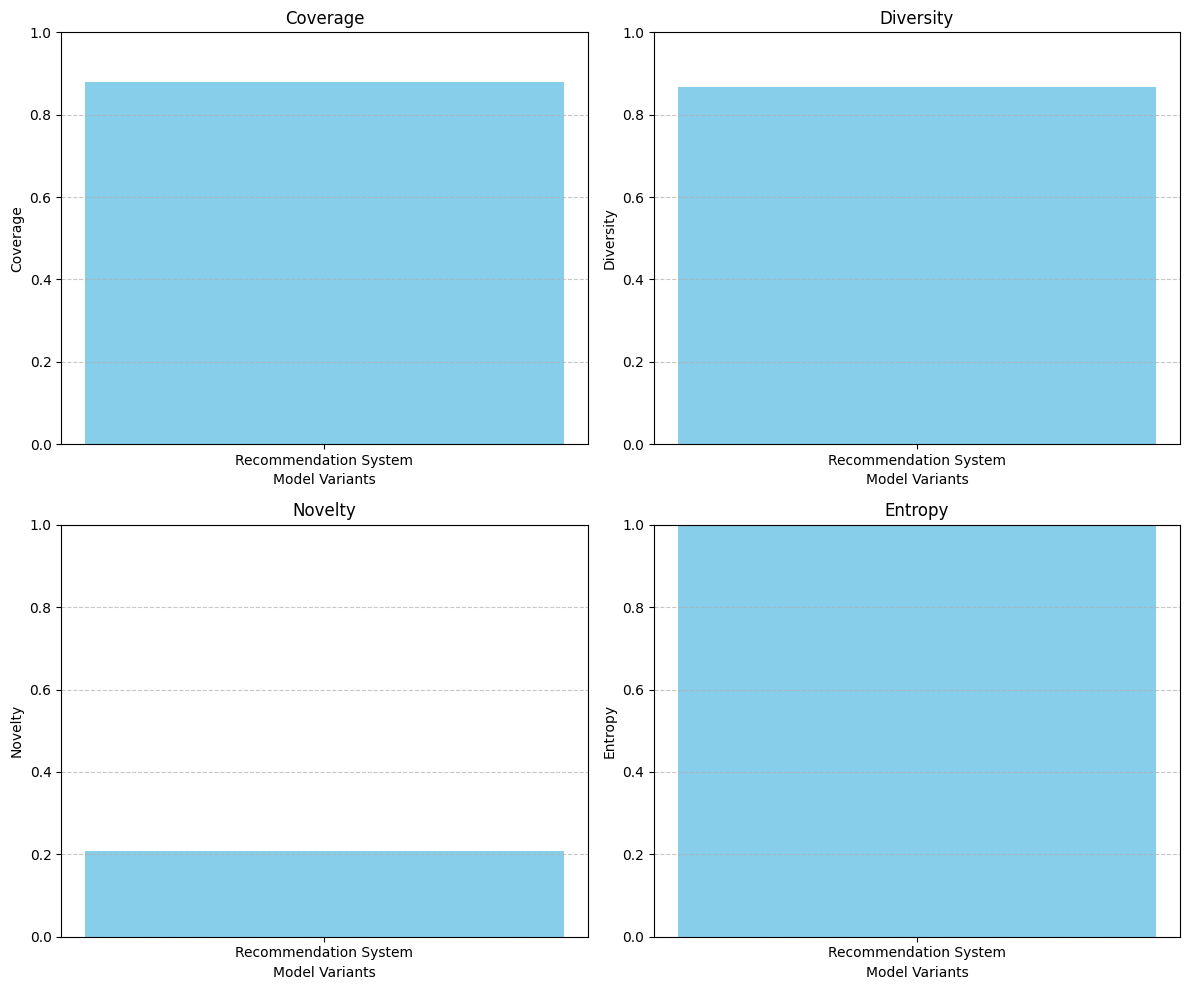

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

# Assuming `pt` is your pivot table (user-item matrix)
# And `similarity_score` is the cosine similarity matrix between books

# 1. **Coverage**: Proportion of books recommended
def calculate_coverage(pt, top_k=5):
    recommended_books = set()
    for user in pt.columns:
        top_books = pt[user].sort_values(ascending=False).head(top_k).index
        recommended_books.update(top_books)
    coverage = len(recommended_books) / len(pt.index)
    return coverage

# 2. **Diversity**: Average dissimilarity between recommended items
def calculate_diversity(pt, similarity_matrix, top_k=5):
    book_index_map = {book: idx for idx, book in enumerate(pt.index)}  # Create a map from book titles to indices
    diversity_scores = []
    
    for user in pt.columns:
        top_books = pt[user].sort_values(ascending=False).head(top_k).index
        top_book_indices = [book_index_map[book] for book in top_books]  # Get indices of the top books
        
        similarities = []
        for i in range(len(top_book_indices)):
            for j in range(i+1, len(top_book_indices)):
                book1_idx = top_book_indices[i]
                book2_idx = top_book_indices[j]
                similarity = similarity_matrix[book1_idx, book2_idx]
                similarities.append(similarity)
        
        diversity = 1 - np.mean(similarities) if similarities else 0
        diversity_scores.append(diversity)
    
    diversity = np.mean(diversity_scores)
    return diversity


# 3. **Novelty**: Measure how "novel" or "surprising" the recommended books are
def calculate_novelty(pt, top_k=5):
    all_recommendations = []
    for user in pt.columns:
        top_books = pt[user].sort_values(ascending=False).head(top_k).index
        all_recommendations.extend(top_books)
    book_counts = Counter(all_recommendations)
    novelty = np.mean([1 / book_counts[book] for book in all_recommendations])
    return novelty

# 4. **Entropy**: Measure randomness of recommendations
def calculate_entropy(pt, top_k=5):
    entropy_scores = []
    for user in pt.columns:
        top_books = pt[user].sort_values(ascending=False).head(top_k).index
        probabilities = [1 / (i + 1) for i in range(top_k)]  # Simple ranking probability
        entropy = -np.sum(np.multiply(probabilities, np.log(probabilities)))
        entropy_scores.append(entropy)
    entropy = np.mean(entropy_scores)
    return entropy

# Example usage
coverage = calculate_coverage(pt)
diversity = calculate_diversity(pt, similarity_score)
novelty = calculate_novelty(pt)
entropy = calculate_entropy(pt)

# Print the metrics
print(f"Coverage: {coverage:.4f}")
print(f"Diversity: {diversity:.4f}")
print(f"Novelty: {novelty:.4f}")
print(f"Entropy: {entropy:.4f}")

# Visualizing the metrics
metrics = {
    "Coverage": [coverage],
    "Diversity": [diversity],
    "Novelty": [novelty],
    "Entropy": [entropy]
}

x_labels = ["Recommendation System"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (metric, values) in enumerate(metrics.items()):
    axes[i].bar(x_labels, values, color='skyblue')
    axes[i].set_title(metric)
    axes[i].set_xlabel("Model Variants")
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0, 1)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
